# 6.5 Unsupervised Machine Learning

## GDELT Conflict Dataset 1.0 (2021)

#### -Errol Hinkamp

##### Table of Contents

1. Import libraries
2. Import data
3. Preprocess data
4. Utilize elbow technique
5. Run k-means algorithm
6. Visualize clusters
7. Calculate statistics

# 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

# 2. Import data

In [2]:
# Import dataframe
path=r'C:\Users\Errol\Documents\Data Analyst Work\Achievement 6'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'gdelt_trimmed.csv'))
df

,Unnamed: 0,Year,CountryName,SumEvents,EventRootDescr,EventDescr,GoldsteinScale,AvgNumMentions,SumNumMentions,AvgAvgTone,Destabilization category
0,0,1979,China,350,FIGHT,Fight with small arms and light weapons,-10.0,3.988571,1396,1.906000,Extremely destabilizing
1,1,1979,Croatia,14,FIGHT,"Use conventional military force, not specified...",-10.0,2.642857,37,4.335594,Extremely destabilizing
2,2,1979,Sudan,16,COERCE,"Arrest, detain, or charge with legal action",-5.0,6.000000,96,3.358047,Moderately destabilizing
3,3,1979,Syria,71,FIGHT,Fight with small arms and light weapons,-10.0,3.647887,259,3.557653,Extremely destabilizing
4,4,1979,Germany,33,COERCE,"Impose administrative sanctions, not specified...",-5.0,4.484848,148,4.841399,Moderately destabilizing
...,...,...,...,...,...,...,...,...,...,...,...
171789,171789,2020,Paraguay,1,USE UNCONVENTIONAL MASS VIOLENCE,Engage in ethnic cleansing,-10.0,2.000000,2,-0.833333,Extremely destabilizing
171790,171790,2020,Andorra,1,ASSAULT,Assassinate,-10.0,8.000000,8,-2.494443,Extremely destabilizing
171791,171791,2020,Gibraltar,4,FIGHT,Employ aerial weapons,-10.0,3.750000,15,-1.181874,Extremely destabilizing
171792,171792,2020,Gaza Strip,2,ASSAULT,Kill by physical assault,-10.0,5.000000,10,-7.157464,Extremely destabilizing


In [3]:
# Drop first column
df=df.drop(df.columns[0], axis=1)
df

,Year,CountryName,SumEvents,EventRootDescr,EventDescr,GoldsteinScale,AvgNumMentions,SumNumMentions,AvgAvgTone,Destabilization category
0,1979,China,350,FIGHT,Fight with small arms and light weapons,-10.0,3.988571,1396,1.906000,Extremely destabilizing
1,1979,Croatia,14,FIGHT,"Use conventional military force, not specified...",-10.0,2.642857,37,4.335594,Extremely destabilizing
2,1979,Sudan,16,COERCE,"Arrest, detain, or charge with legal action",-5.0,6.000000,96,3.358047,Moderately destabilizing
3,1979,Syria,71,FIGHT,Fight with small arms and light weapons,-10.0,3.647887,259,3.557653,Extremely destabilizing
4,1979,Germany,33,COERCE,"Impose administrative sanctions, not specified...",-5.0,4.484848,148,4.841399,Moderately destabilizing
...,...,...,...,...,...,...,...,...,...,...
171789,2020,Paraguay,1,USE UNCONVENTIONAL MASS VIOLENCE,Engage in ethnic cleansing,-10.0,2.000000,2,-0.833333,Extremely destabilizing
171790,2020,Andorra,1,ASSAULT,Assassinate,-10.0,8.000000,8,-2.494443,Extremely destabilizing
171791,2020,Gibraltar,4,FIGHT,Employ aerial weapons,-10.0,3.750000,15,-1.181874,Extremely destabilizing
171792,2020,Gaza Strip,2,ASSAULT,Kill by physical assault,-10.0,5.000000,10,-7.157464,Extremely destabilizing


##### Data was already cleaned in a previous exercise, so I will forgo doing so again

In [4]:
# Make graphs display automatically
%matplotlib inline

# 3. Preprocess data

In [5]:
# Drop all non-numerical columns
df=df.drop(['CountryName', 'EventRootDescr', 'EventDescr', 'Destabilization category'], axis=1)
df

,Year,SumEvents,GoldsteinScale,AvgNumMentions,SumNumMentions,AvgAvgTone
0,1979,350,-10.0,3.988571,1396,1.906000
1,1979,14,-10.0,2.642857,37,4.335594
2,1979,16,-5.0,6.000000,96,3.358047
3,1979,71,-10.0,3.647887,259,3.557653
4,1979,33,-5.0,4.484848,148,4.841399
...,...,...,...,...,...,...
171789,2020,1,-10.0,2.000000,2,-0.833333
171790,2020,1,-10.0,8.000000,8,-2.494443
171791,2020,4,-10.0,3.750000,15,-1.181874
171792,2020,2,-10.0,5.000000,10,-7.157464


In [6]:
# Standardize data
scaler=StandardScaler()
df_std=scaler.fit_transform(df)
df_std=pd.DataFrame(df_std)
df_std

,0,1,2,3,4,5
0,-2.159410,-0.015158,-0.822443,-0.389589,-0.032515,-0.049034
1,-2.159410,-0.054188,-0.822443,-0.578136,-0.042019,0.585852
2,-2.159410,-0.053956,1.728061,-0.107768,-0.041607,0.330406
3,-2.159410,-0.047567,-0.822443,-0.437322,-0.040467,0.382566
4,-2.159410,-0.051981,1.728061,-0.320056,-0.041243,0.718026
...,...,...,...,...,...,...
171789,1.429917,-0.055698,-0.822443,-0.668207,-0.042264,-0.764861
171790,1.429917,-0.055698,-0.822443,0.172452,-0.042222,-1.198932
171791,1.429917,-0.055350,-0.822443,-0.423015,-0.042173,-0.855939
171792,1.429917,-0.055582,-0.822443,-0.247878,-0.042208,-2.417445


In [7]:
# Rename columns
df_std.columns=['Year', 'SumEvents', 'GoldsteinScale', 'AvgNumMentions', 'SumNumMentions', 'AvgAvgTone']
df_std

,Year,SumEvents,GoldsteinScale,AvgNumMentions,SumNumMentions,AvgAvgTone
0,-2.159410,-0.015158,-0.822443,-0.389589,-0.032515,-0.049034
1,-2.159410,-0.054188,-0.822443,-0.578136,-0.042019,0.585852
2,-2.159410,-0.053956,1.728061,-0.107768,-0.041607,0.330406
3,-2.159410,-0.047567,-0.822443,-0.437322,-0.040467,0.382566
4,-2.159410,-0.051981,1.728061,-0.320056,-0.041243,0.718026
...,...,...,...,...,...,...
171789,1.429917,-0.055698,-0.822443,-0.668207,-0.042264,-0.764861
171790,1.429917,-0.055698,-0.822443,0.172452,-0.042222,-1.198932
171791,1.429917,-0.055350,-0.822443,-0.423015,-0.042173,-0.855939
171792,1.429917,-0.055582,-0.822443,-0.247878,-0.042208,-2.417445


# 4. Utilize elbow technique

In [8]:
# Set range of clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [9]:
# List rates of variation for different numbers of clusters
score=[kmeans[i].fit(df_std).score(df_std) for i in range(len(kmeans))]
score

[-1030764.0000000002,
 -772749.7522697861,
 -545133.514615777,
 -419515.8476587502,
 -361430.10684289114,
 -304460.490790262,
 -271390.71833654837,
 -237346.48881848052,
 -210854.03088437184]

Text(0.5, 1.0, 'Elbow Curve')

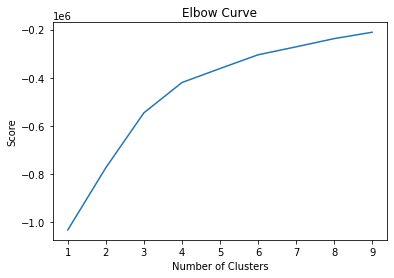

In [10]:
# Plot elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

##### This is a bit subjective, but I feel as if 4 clusters is the point at which the line starts to level off.

# 5. Run k-means algorithm

In [11]:
# Create k-means object and fit to data
kmeans = KMeans(n_clusters = 4) 
kmeans.fit(df_std)

KMeans(n_clusters=4)

In [12]:
# Add "clusters" column to original dataframe
df['clusters'] = kmeans.fit_predict(df_std)
df

,Year,SumEvents,GoldsteinScale,AvgNumMentions,SumNumMentions,AvgAvgTone,clusters
0,1979,350,-10.0,3.988571,1396,1.906000,0
1,1979,14,-10.0,2.642857,37,4.335594,0
2,1979,16,-5.0,6.000000,96,3.358047,3
3,1979,71,-10.0,3.647887,259,3.557653,0
4,1979,33,-5.0,4.484848,148,4.841399,3
...,...,...,...,...,...,...,...
171789,2020,1,-10.0,2.000000,2,-0.833333,1
171790,2020,1,-10.0,8.000000,8,-2.494443,1
171791,2020,4,-10.0,3.750000,15,-1.181874,1
171792,2020,2,-10.0,5.000000,10,-7.157464,1


In [13]:
# Tally up entries in each cluster category
df['clusters'].value_counts()

0    97891
1    37635
3    36243
2       25
Name: clusters, dtype: int64

# 6. Visualize clusters

Text(0, 0.5, 'Sum of Events')

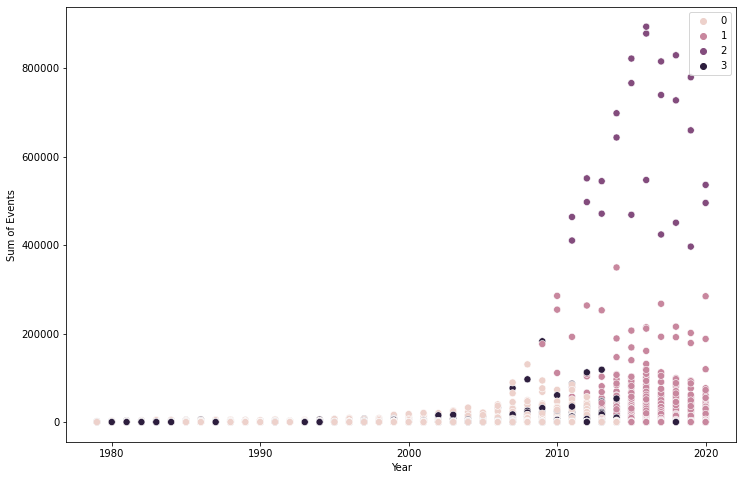

In [14]:
# Plot the clusters for year vs sum events
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['SumEvents'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Sum of Events')

Text(0, 0.5, 'Goldstein Score')

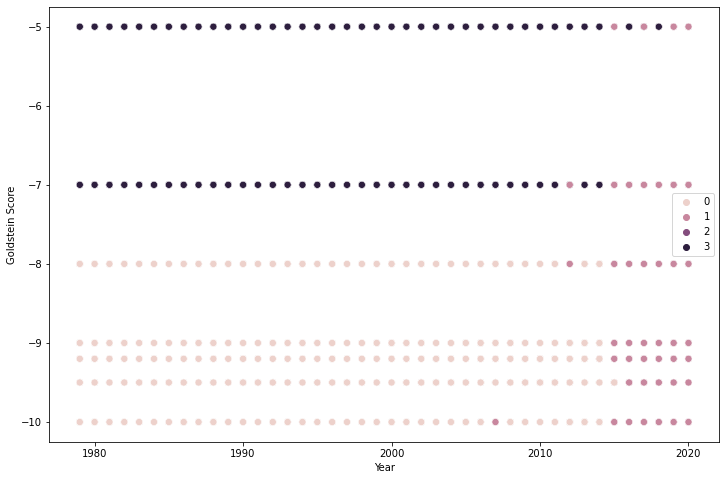

In [15]:
# Plot the clusters for year vs Goldstein score
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['GoldsteinScale'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Goldstein Score')

Text(0, 0.5, 'Average Mentions')

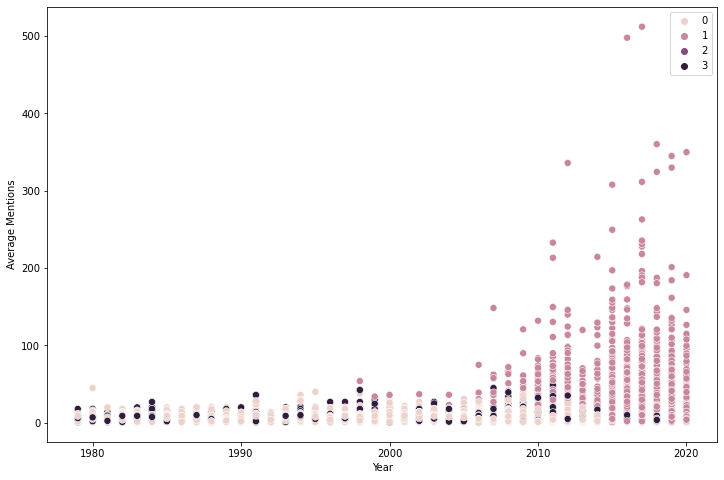

In [16]:
# Plot the clusters for year vs average mentions
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['AvgNumMentions'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Average Mentions')

Text(0, 0.5, 'Total Mentions')

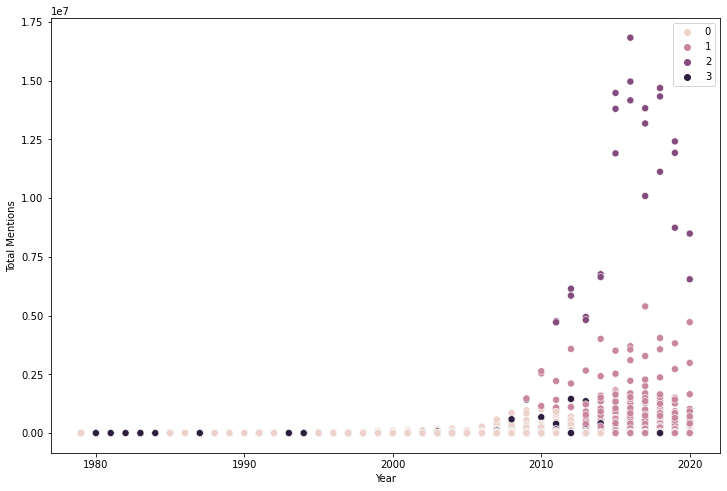

In [17]:
# Plot the clusters for year vs total mentions
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['SumNumMentions'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Total Mentions')

Text(0, 0.5, 'Average Tone')

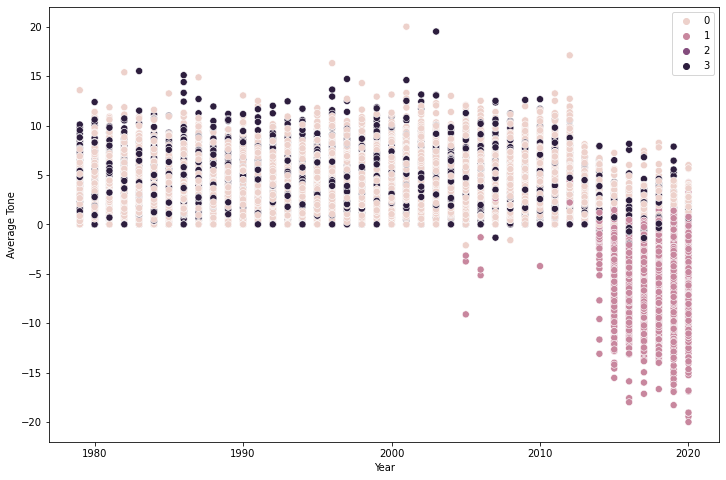

In [18]:
# Plot the clusters for year vs average tone
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['AvgAvgTone'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Average Tone')

Text(0, 0.5, 'Goldstein Score')

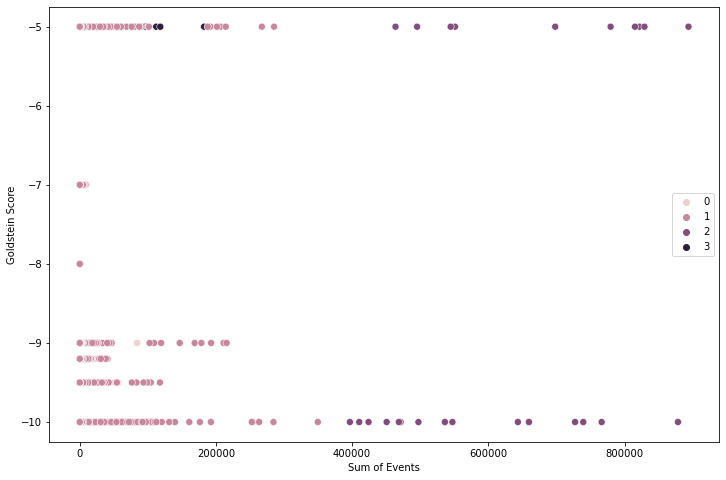

In [19]:
# Plot the clusters for sum events vs Goldstein score
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['SumEvents'], y=df['GoldsteinScale'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Sum of Events')
plt.ylabel('Goldstein Score')

Text(0, 0.5, 'Average Mentions')

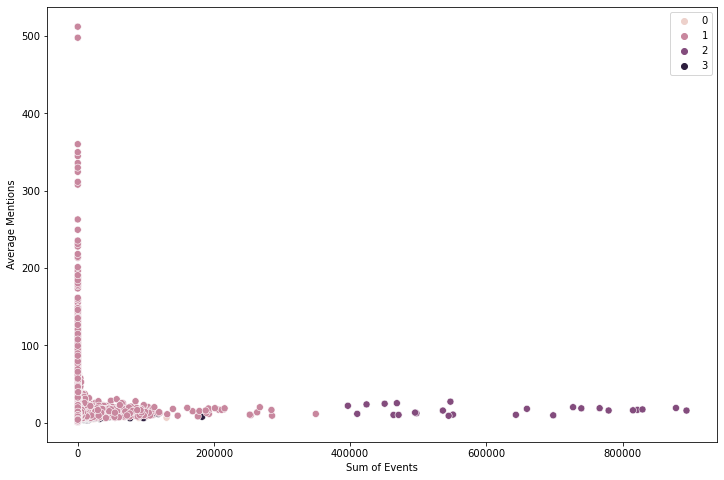

In [20]:
# Plot the clusters for sum events vs average mentions
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['SumEvents'], y=df['AvgNumMentions'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Sum of Events')
plt.ylabel('Average Mentions')

Text(0, 0.5, 'Total Mentions')

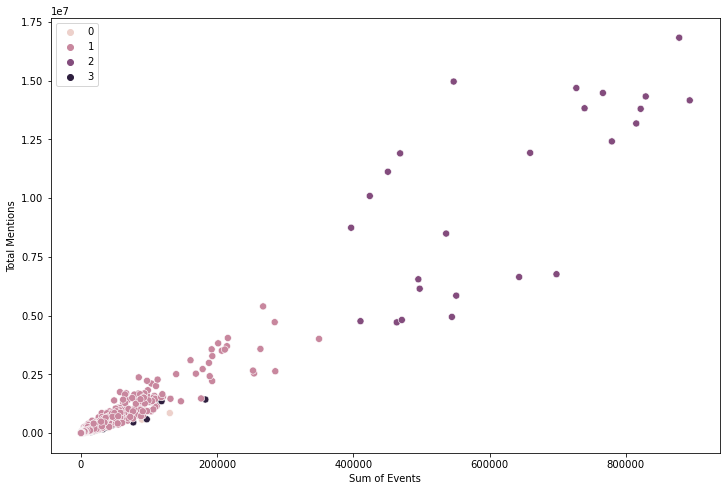

In [21]:
# Plot the clusters for sum events vs total mentions
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['SumEvents'], y=df['SumNumMentions'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Sum of Events')
plt.ylabel('Total Mentions')

Text(0, 0.5, 'Average Tone')

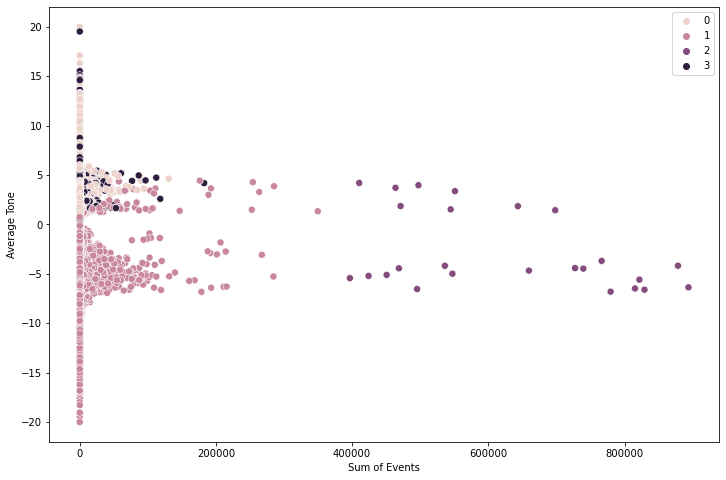

In [22]:
# Plot the clusters for sum events vs average tone
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['SumEvents'], y=df['AvgAvgTone'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Sum of Events')
plt.ylabel('Average Tone')

Text(0, 0.5, 'Average Mentions')

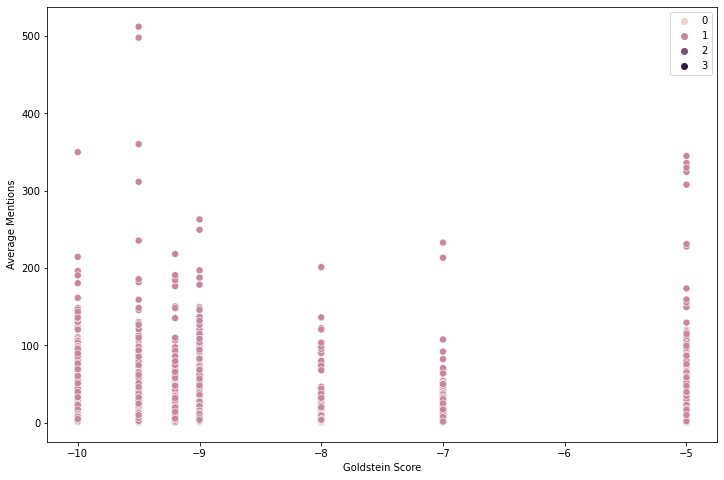

In [23]:
# Plot the clusters for Goldstein score vs average mentions
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GoldsteinScale'], y=df['AvgNumMentions'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Goldstein Score')
plt.ylabel('Average Mentions')

Text(0, 0.5, 'Total Mentions')

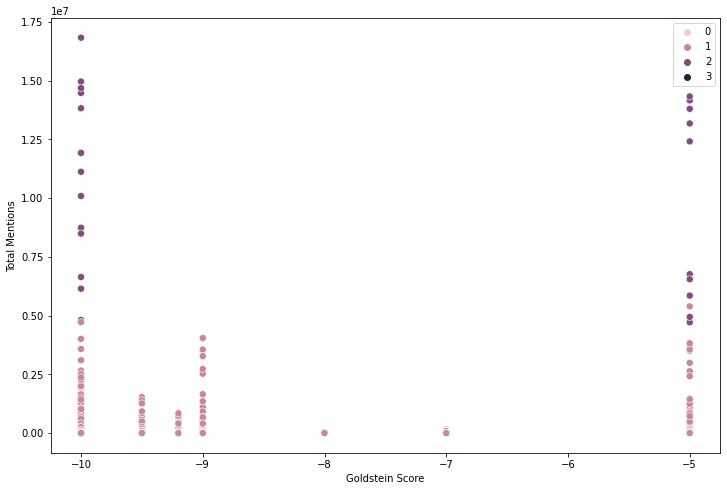

In [24]:
# Plot the clusters for Goldstein score vs total mentions
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GoldsteinScale'], y=df['SumNumMentions'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Goldstein Score')
plt.ylabel('Total Mentions')

Text(0, 0.5, 'Average Tone')

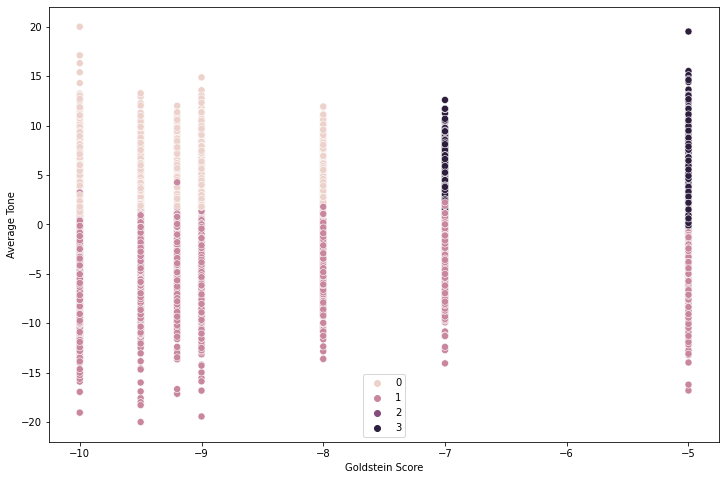

In [25]:
# Plot the clusters for Goldstein score vs average tone
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GoldsteinScale'], y=df['AvgAvgTone'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Goldstein Score')
plt.ylabel('Average Tone')

Text(0, 0.5, 'Total Mentions')

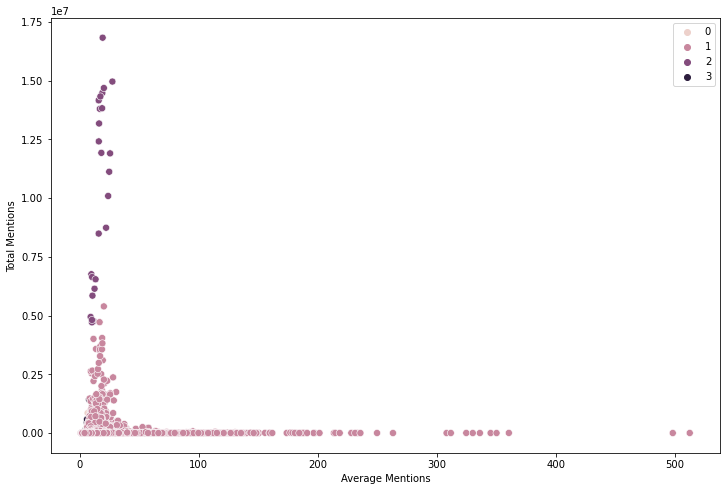

In [26]:
# Plot the clusters for average mentions vs total mentions
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['AvgNumMentions'], y=df['SumNumMentions'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Average Mentions')
plt.ylabel('Total Mentions')

Text(0, 0.5, 'Average Tone')

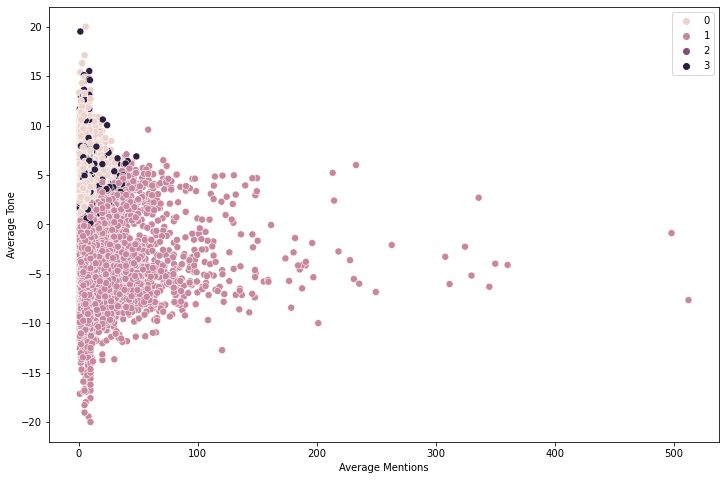

In [27]:
# Plot the clusters for average mentions vs average tone
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['AvgNumMentions'], y=df['AvgAvgTone'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Average Mentions')
plt.ylabel('Average Tone')

Text(0, 0.5, 'Average Tone')

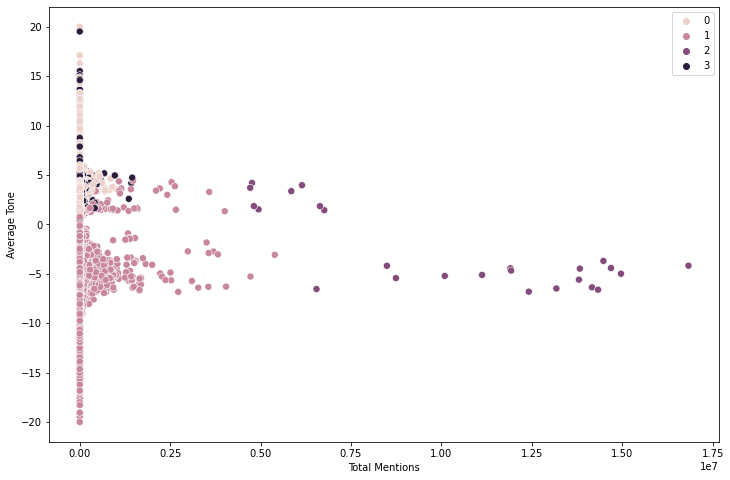

In [28]:
# Plot the clusters for total mentions vs average tone
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['SumNumMentions'], y=df['AvgAvgTone'], hue=kmeans.labels_, s=50) 
ax.grid(False)
plt.xlabel('Total Mentions')
plt.ylabel('Average Tone')

##### The light pink cluster (0) is the largest and covers events from the earliest point in the dataset to about 2015. All incidents in this cluster are viewed either neutrally or slightly positively. In terms of Goldstein score, they all rate -8, -9, or -10, the lowest possible ratings signifying the greatest destabilizing potential. The have low both total and average mentions.

##### The medium pink cluster (1) is the second largest, and consists almost entirely of events that occured within the last 10-15 years. These events are mostly viewed negatively. It spans the full range of average mentions but only the bottom 25% of total mentions. In terms of Goldstein score, it covers the full range of values present in the dataset. It only includes values up to the bottom half of the sum of events.

##### The medium purple cluster (2) only covers events in the past 10 years or so. It has higher than normal total mentions and sum events and a middling tone. In terms of Goldstein score, it only includes the most negative (-10) and least negative (-5) values.

##### The dark purple cluster (3) is the smallest and consists of positively viewed events with Goldstein scores of -5 and -7. In terms of year, it covers the entire length of the dataset.

# 7. Calculate statistics

In [29]:
# Rename clusters for simplicity
df.loc[df['clusters'] == 0, 'cluster color'] = 'light pink'
df.loc[df['clusters'] == 1, 'cluster color'] = 'medium pink'
df.loc[df['clusters'] == 2, 'cluster color'] = 'medium purple'
df.loc[df['clusters'] == 3, 'cluster color'] = 'dark purple'

In [32]:
# Disable column limits
pd.options.display.max_columns = None
# Calculate statistics
df.groupby('cluster color').agg({'Year':['min', 'mean', 'median','max'], 
                        'SumEvents':['min', 'mean', 'median','max'],  
                        'GoldsteinScale':['min', 'mean', 'median','max'], 
                         'AvgNumMentions':['min', 'mean', 'median','max'],
                          'SumNumMentions':['min', 'mean', 'median','max'],
                        'AvgAvgTone':['min', 'mean', 'median','max']})

Year                            SumEvents                 \
                min         mean  median   max       min           mean   
cluster color                                                             
dark purple    1979  1999.795243  2001.0  2020         1     267.067241   
light pink     1979  1999.866484  2001.0  2020         1     178.461135   
medium pink    1998  2017.270174  2017.0  2020         1    1059.855427   
medium purple  2011  2015.800000  2016.0  2020    396650  620377.200000   

                                GoldsteinScale                        \
                 median     max            min      mean median  max   
cluster color                                                          
dark purple        12.0  182611           -7.0 -5.219298   -5.0 -5.0   
light pink         10.0  130390          -10.0 -9.519629   -9.5 -8.0   
medium pink        41.0  349534          -10.0 -8.494888   -9.2 -5.0   
medium purple  550990.0  893895          -10.0 -8.000000  -10.0 -5.0   

              AvgNumMentions                                   SumNumMentions  \
                         min       mean     median         max            min   
cluster color                                                                   
dark purple         1.000000   5.664572   5.000000   48.555556              1   
light pink          1.000000   5.359771   4.757576   45.000000              1   
medium pink         1.000000  11.492351   8.634146  512.250000              1   
medium purple       9.078499  16.539355  16.166726   27.349344        4713226   

                                                  AvgAvgTone            \
                       mean      median       max        min      mean   
cluster color                                                            
dark purple    2.081745e+03        58.0   1450926  -2.704853  4.029901   
light pink     1.426215e+03        47.0   1012204  -2.119680  3.846083   
medium pink    1.507483e+04       387.0   5392636 -20.000000 -4.326013   
medium purple  1.024737e+07  11125615.0  16834208  -6.809885 -2.697139   

                                    
                 median        max  
cluster color                       
dark purple    4.108470  19.512195  
light pink     3.825066  20.000000  
medium pink   -4.515378   9.581977  
medium purple -4.446752   4.194788

##### Each individual cluster may be worth examining further on its own. The medium purple cluster, for instance, which is made up entirely of events with extremely high mentions, warrants investigation. Which events does this cluster include? They must have been pretty important to get so many mentions!